In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
def processing(path):

    df_avc = pd.read_csv(path)
    df_avc.columns = ['Id','Genre','Age', 'Hypertension', 'Maladie_cardiaque', 'Deja_marie', 'Type_job', 'Zone_residence', 'Glycemie', 'IMC', 'Fumeur', 'AVC']

    #Remplacement des valeurs en chaine de caractères en int

    #Homme = 0, Femme = 1, Autre = 2
    df_avc.Genre = df_avc.Genre.replace('Male', 0)
    df_avc.Genre = df_avc.Genre.replace('Female', 1)
    df_avc.Genre = df_avc.Genre.replace('Other', 2)

    #Déjà marié : 0 => non; 1=> oui
    df_avc.Deja_marie = df_avc.Deja_marie.replace('No', 0)
    df_avc.Deja_marie = df_avc.Deja_marie.replace('Yes', 1)

    #Type de travail : Secteur privé (0), Secteur public (1),
    # Auto-entrepreneur (2), enfant (3), jamais travaillé (4)
    df_avc.Type_job = df_avc.Type_job.replace('Private', 0)
    df_avc.Type_job = df_avc.Type_job.replace('Govt_job', 1)
    df_avc.Type_job = df_avc.Type_job.replace('Self-employed', 2)
    df_avc.Type_job = df_avc.Type_job.replace('children', 3)
    df_avc.Type_job = df_avc.Type_job.replace('Never_worked', 4)

    #Zone résidentielle : Urbain (0), Rural (2)
    df_avc.Zone_residence = df_avc.Zone_residence.replace('Urban', 0)
    df_avc.Zone_residence = df_avc.Zone_residence.replace('Rural', 1)

    #Fumeur : Jamais fumé (0), Ancien fumeur (1), Fumeur (2), inconnu (3)
    df_avc.Fumeur = df_avc.Fumeur.replace('never smoked', 0)
    df_avc.Fumeur = df_avc.Fumeur.replace('formerly smoked', 1)
    df_avc.Fumeur = df_avc.Fumeur.replace('smokes', 2)
    df_avc.Fumeur = df_avc.Fumeur.replace('Unknown', 3)
    
    #remplacement des nan par la moyenne de la colonne
    #df_avc['IMC'].fillna((df_avc['IMC'].mean()), inplace=True)
    
    # OU suppression des nan
    df_avc = df_avc.dropna()
    
    #sépération Train/Test
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(df_avc[['Genre', 'Age', 'Hypertension', 'Maladie_cardiaque', 'Deja_marie', 'Type_job', 'Zone_residence', 'Glycemie', 'IMC', 'Fumeur']], df_avc['AVC'], test_size=0.20, random_state=42)
    #print(df_avc)
    #print(Xtrain)
    #print(Ytrain)
    #print(Xtest)
    #print(Ytest)
    return df_avc, Xtrain, Xtest, Ytrain, Ytest

In [15]:
df_avc, Xtrain, Xtest, Ytrain, Ytest=processing("healthcare-dataset-stroke-data.csv")
print(df_avc)

         Id  Genre   Age  Hypertension  Maladie_cardiaque  Deja_marie  \
0      9046      0  67.0             0                  1           1   
2     31112      0  80.0             0                  1           1   
3     60182      1  49.0             0                  0           1   
4      1665      1  79.0             1                  0           1   
5     56669      0  81.0             0                  0           1   
...     ...    ...   ...           ...                ...         ...   
5104  14180      1  13.0             0                  0           0   
5106  44873      1  81.0             0                  0           1   
5107  19723      1  35.0             0                  0           1   
5108  37544      0  51.0             0                  0           1   
5109  44679      1  44.0             0                  0           1   

      Type_job  Zone_residence  Glycemie   IMC  Fumeur  AVC  
0            0               0    228.69  36.6       1    1  

In [12]:
from sklearn.linear_model import Perceptron
perceptron=Perceptron()
perceptron.fit(Xtrain, Ytrain)
perceptron.score(Xtest, Ytest)

0.9460285132382892

In [7]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier()
mlp.fit(Xtrain, Ytrain)
mlp.score(Xtest, Ytest)

0.9460285132382892

In [10]:
>>> from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=1, random_state=0)
rf.fit(Xtrain, Ytrain)
rf.score(Xtest,Ytest)

0.9460285132382892

In [14]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(Xtrain, Ytrain)
reg.score(Xtest, Ytest)


0.08693831186892065

In [20]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(Xtrain,Ytrain)
pca.score(Xtest,Ytest)

-18.067746598254576

Automatically created module for IPython interactive environment


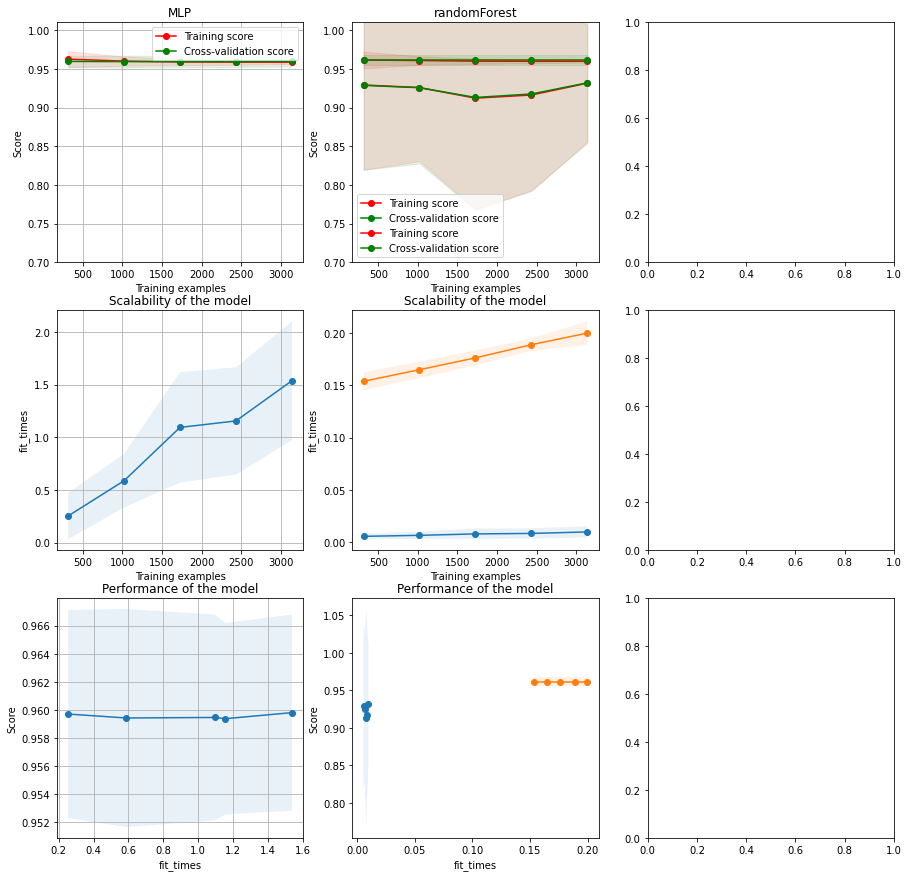

In [27]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 3, figsize=(15, 15))

X, y = load_digits(return_X_y=True)

title = "MLP"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(MLPClassifier(), title, Xtrain, Ytrain, axes=axes[:, 0], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

title = "Perceptron"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(Perceptron(), title, Xtrain, Ytrain, axes=axes[:, 1], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

title = "randomForest"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(RandomForestClassifier(max_depth=1, random_state=0), title, Xtrain, Ytrain, axes=axes[:, 1], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

plt.show()